In [41]:
# Install library for processing raster files RasterIO and import it
#!pip install rioxarray
import rioxarray as rxr
import numpy as np
#Import library for plotting
import matplotlib.pyplot as plt

# mount folder from personal google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(20, 1010, 1010)
[502.67 522.85 543.21 562.82 582.59 602.53 622.64 647.04 662.66 683.12
 702.91 722.95 743.24 762.81 782.6  802.62 822.87 843.35 863.02 882.89]


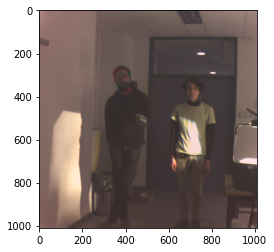

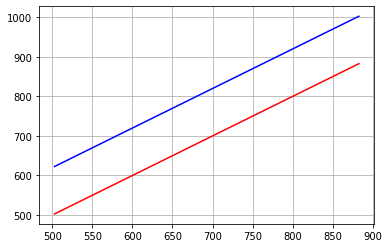

In [73]:
# Path to the hypercube
path = "drive/MyDrive/InformacjaObrazowa/image/IO22hypercube.tif"

# Load image to a n-array
hyper = rxr.open_rasterio(path)

# Check shape of the final array (check which dimension represents spectral channels?)
print(hyper.shape)

# Generate list of channels in nm and print them
channels = np.array([ float(ch.split(' ')[0]) for ch in hyper.long_name ])
print(channels)

## Create colour mosaic with selected channels for RGB image
# Create an empty array with a proper size
img = np.ndarray([1010,1010,3])
# Assign 6th channel as red (622.64 nm )
img[:,:,0] = hyper[6,:,:]
# Assign 4th channel as green (582.59 nm)
img[:,:,1] = hyper[4,:,:]
# Assign 2nd channel as blue (502.67)
img[:,:,2] = hyper[0,:,:]
# Show image
plt.imshow(img)
plt.show()

# Base on function plot prepare a figure with spectral reflectance plot for two different textiles visible in the picture. Use variable "channel" as x value in plot(x,y). Value y should be taken from the hypercube.
# Below are simple examples how to plot two lines on a figure. 
#   plot(   x    ,   y    , colour)
plt.plot(channels,channels,'r')
plt.plot(channels,channels+120,'b')
plt.grid()
plt.show()
